In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Final_Estimate.csv',index_col = 0)
df

,Iso_Code,Year,Literacy Rate,Aids_Death,Overweight,GDP per Capita,Hepatit Vaccination,Hospital Beds,Variant,"Region, subregion, country or area *",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,AFG,1980,34.350000,307.187500,7.300000,276.00000,63.000000,0.3,Estimates,Afghanistan,...,704.375,617.683,367.132,414.173,313.674,521.206,575.356,456.101,-1205.401,-92.075
1,ALB,1980,97.516667,100.000000,35.600000,728.35900,99.000000,4.3,Estimates,Albania,...,206.554,140.002,56.395,68.925,42.123,113.200,138.768,86.186,-9.135,-3.101
2,DZA,1980,69.720000,209.375000,33.300000,2268.60700,81.000000,2.5,Estimates,Algeria,...,472.467,418.768,191.216,204.628,177.606,326.761,357.691,295.197,29.298,1.564
3,ASM,1980,97.300000,8146.235685,29.094595,3833.17977,55.984127,1.0,Estimates,American Samoa,...,273.200,156.261,94.710,124.704,60.943,191.002,244.727,130.293,0.115,3.501
4,AND,1980,79.667376,8146.235685,50.400000,15662.00000,75.000000,4.5,Estimates,Andorra,...,123.148,68.832,33.047,40.078,24.698,82.599,106.366,56.321,0.959,27.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,VEN,2021,97.500000,2300.000000,54.994286,1627.35300,56.000000,0.9,Estimates,Venezuela (Bolivarian Republic of),...,267.610,133.069,110.190,159.363,57.051,184.265,248.498,115.516,-525.116,-18.451
8564,VNM,2021,91.480000,3500.000000,10.645714,3742.85800,83.000000,2.6,Estimates,Viet Nam,...,212.116,96.666,70.527,100.801,39.007,131.241,183.997,77.554,-0.992,-0.010
8565,YEM,2021,45.600000,500.000000,35.357143,585.00300,72.000000,0.7,Estimates,Yemen,...,347.585,225.259,124.294,164.127,81.618,235.095,294.032,171.918,-101.468,-3.072
8566,ZMB,2021,74.342857,19000.000000,20.568571,1115.27200,91.000000,2.0,Estimates,Zambia,...,414.859,297.382,168.411,202.990,133.336,309.112,368.647,250.213,9.015,0.463


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 8567
Data columns (total 71 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Iso_Code                                                                                        8568 non-null   object 
 1   Year                                                                                            8568 non-null   int64  
 2   Literacy Rate                                                                                   8568 non-null   float64
 3   Aids_Death                                                                                      8568 non-null   float64
 4   Overweight                                                                                      8568 non-null   float64
 5   GDP per Capit

In [3]:
#replace '...' with np.nan
import numpy as np
for columns in df.columns:
    df[columns].replace('...',np.nan, inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 8567
Data columns (total 71 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Iso_Code                                                                                        8568 non-null   object 
 1   Year                                                                                            8568 non-null   int64  
 2   Literacy Rate                                                                                   8568 non-null   float64
 3   Aids_Death                                                                                      8568 non-null   float64
 4   Overweight                                                                                      8568 non-null   float64
 5   GDP per Capit

In [4]:
#removing some columns that are not useful
train_set = df.drop(['Iso_Code', 'Variant','Region, subregion, country or area *','Unnamed: 11','Notes','ISO2 Alpha-code',
                    'SDMX code**', 'Type','Parent code','Population Annual Doubling Time (years)'], axis=1)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 8567
Data columns (total 61 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Year                                                                                            8568 non-null   int64  
 1   Literacy Rate                                                                                   8568 non-null   float64
 2   Aids_Death                                                                                      8568 non-null   float64
 3   Overweight                                                                                      8568 non-null   float64
 4   GDP per Capita                                                                                  8568 non-null   float64
 5   Hepatit Vacci

## reducing columns with high correlation ( >90% )

In [132]:
def corrFilter(x: pd.DataFrame, bound: float):
    
    ''' 
    create the correlation matrix, filter it, and then flatten it
    
    '''
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened



In [133]:
df_corr = pd.DataFrame(corrFilter(train_set, .9))
df_corr

0
Mortality before Age 60, both sexes (deaths und... Life Expectancy at Birth, both sexes (years)       -0.987212
Female Mortality before Age 60 (deaths under ag... Female Life Expectancy at Birth (years)            -0.985869
Male Life Expectancy at Birth (years)              Male Mortality before Age 60 (deaths under age ... -0.985729
Mortality before Age 60, both sexes (deaths und... Male Life Expectancy at Birth (years)              -0.985474
Male Life Expectancy at Age 15 (years)             Male Mortality between Age 15 and 60 (deaths un... -0.982943
...                                                                                                         ...
Total Population, as of 1 July (thousands)         Female Population, as of 1 July (thousands)         0.999882
Total Population, as of 1 January (thousands)      Female Population, as of 1 July (thousands)         0.999892
Total Population, as of 1 July (thousands)         Male Population, as of 1 July (thousands)           0.999892
                                                   Total Population, as of 1 January (thousands)       0.999995
Year                                               Year                                                     NaN

[223 rows x 1 columns]

In [31]:
df_corr.to_csv('correlations.csv')

In [72]:
#showing columns with correlation > 0.9
df_corr.style.background_gradient(cmap='coolwarm')

,,0
"Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Life Expectancy at Birth, both sexes (years)",-0.987212
"Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)",Female Life Expectancy at Birth (years),-0.985869
Male Life Expectancy at Birth (years),"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)",-0.985729
"Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)",Male Life Expectancy at Birth (years),-0.985474
Male Life Expectancy at Age 15 (years),"Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)",-0.982943
"Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Life Expectancy at Birth, both sexes (years)",-0.978657
"Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Life Expectancy at Age 15, both sexes (years)",-0.977566
Female Life Expectancy at Birth (years),"Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)",-0.976447
"Life Expectancy at Age 15, both sexes (years)","Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)",-0.975422
Male Life Expectancy at Age 15 (years),"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)",-0.972377


In [134]:
#reducing columns with correlation > 0.9
train_set = train_set.drop(['Total Population, as of 1 January (thousands)', 
                            'Male Deaths (thousands)',
                            'Female Deaths (thousands)',
                            'Female Population, as of 1 July (thousands)',
                            'Male Population, as of 1 July (thousands)',
                            'Female Life Expectancy at Birth (years)',
                            'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)',
                            'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)',
                            'Life Expectancy at Age 65, both sexes (years)',
                           'Male Life Expectancy at Age 65 (years)',
                            'Male Life Expectancy at Age 15 (years)', 
                            'Life Expectancy at Age 15, both sexes (years)',
                            'Male Life Expectancy at Age 80 (years)',
                            'Female Life Expectancy at Age 80 (years)',
                            'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
                            'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)',
                            'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
                            'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
                            'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
                            'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)',
                            'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)', 
                            'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)',
                            'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
                            'Total Deaths (thousands)', 
                            'Natural Change, Births minus Deaths (thousands)',
                            'Births (thousands)', 
                            'Live Births Surviving to Age 1 (thousands)',
                            'Births by women aged 15 to 19 (thousands)',
                            'Life Expectancy at Age 80, both sexes (years)', 
                            'Net Reproduction Rate (surviving daughters per woman)',
                            'Under-Five Deaths, under age 5 (thousands)',
                          'Male Life Expectancy at Birth (years)', 
                            'Female Life Expectancy at Age 15 (years)',
                            'Infant Mortality Rate (infant deaths per 1,000 live births)',
                            'Rate of Natural Change (per 1,000 population)',
                            'Crude Birth Rate (births per 1,000 population)',
                          'Female Life Expectancy at Age 65 (years)',
                          'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)',
                          'Under-Five Mortality (deaths under age 5 per 1,000 live births)'
                          
                            
                            
                            
                            
                            
                            ], axis=1)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 8567
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        8568 non-null   int64  
 1   Literacy Rate                                               8568 non-null   float64
 2   Aids_Death                                                  8568 non-null   float64
 3   Overweight                                                  8568 non-null   float64
 4   GDP per Capita                                              8568 non-null   float64
 5   Hepatit Vaccination                                         8568 non-null   float64
 6   Hospital Beds                                               8568 non-null   float64
 7   Location code                                               8568 non-null   int64  
 8 

In [135]:
df_train = train_set

In [136]:
df_train

,Year,Literacy Rate,Aids_Death,Overweight,GDP per Capita,Hepatit Vaccination,Hospital Beds,Location code,"Total Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)",...,Population Change (thousands),Population Growth Rate (percentage),Total Fertility Rate (live births per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)","Infant Deaths, under age 1 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1980,34.350000,307.187500,7.300000,276.00000,63.000000,0.3,4,12486.631,19.231,...,-861.447,-6.902,7.588,29.926,105.0,24.209,39.618,110.150,-1205.401,-92.075
1,1980,97.516667,100.000000,35.600000,728.35900,99.000000,4.3,8,2941.651,107.367,...,51.897,1.764,3.614,29.011,108.6,6.050,70.478,4.163,-9.135,-3.101
2,1980,69.720000,209.375000,33.300000,2268.60700,81.000000,2.5,12,18739.378,7.868,...,593.439,3.167,6.952,30.598,104.5,13.583,53.261,87.298,29.298,1.564
3,1980,97.300000,8146.235685,29.094595,3833.17977,55.984127,1.0,16,32.886,164.428,...,1.065,3.239,4.608,29.754,106.0,4.957,68.929,0.023,0.115,3.501
4,1980,79.667376,8146.235685,50.400000,15662.00000,75.000000,4.5,20,35.611,75.768,...,1.406,3.949,1.971,28.367,106.3,4.209,76.840,0.007,0.959,27.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,2021,97.500000,2300.000000,54.994286,1627.35300,56.000000,0.9,862,28199.867,30.771,...,-304.417,-1.080,2.211,26.323,105.4,8.124,70.554,7.123,-525.116,-18.451
8564,2021,91.480000,3500.000000,10.645714,3742.85800,83.000000,2.6,704,97468.029,310.993,...,748.509,0.768,1.944,27.373,111.4,7.317,73.618,23.910,-0.992,-0.010
8565,2021,45.600000,500.000000,35.357143,585.00300,72.000000,0.7,887,32981.641,62.469,...,681.359,2.066,3.795,29.862,105.9,6.845,63.753,47.243,-101.468,-3.072
8566,2021,74.342857,19000.000000,20.568571,1115.27200,91.000000,2.0,894,19473.125,26.195,...,545.226,2.800,4.308,28.522,101.1,6.973,61.223,27.141,9.015,0.463


## Repeat above procedure for test data

In [137]:
df = pd.read_csv('Final_Prediction(1).csv',index_col = 0)
df

,Iso_Code,Year,Literacy Rate,Aids_Death,Overweight,GDP per Capita,Hepatit Vaccination,Hospital Beds,Variant,"Region, subregion, country or area *",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,AFG,2022,34.350000,307.187500,14.005405,611.26800,66.000000,0.4,Medium,Afghanistan,...,374.257,248.539,150.287,195.837,101.294,268.266,329.563,203.017,-65.846,-1.600
1,ALB,2022,97.516667,100.000000,45.581081,6284.02700,98.000000,2.9,Medium,Albania,...,128.238,70.424,39.528,51.066,27.794,89.150,118.030,60.363,-8.000,-2.810
2,DZA,2022,69.720000,209.375000,47.770270,3672.46300,91.000000,1.9,Medium,Algeria,...,114.342,83.302,38.562,44.630,32.151,78.036,91.602,63.708,-9.999,-0.223
3,ASM,2022,97.300000,8146.235685,38.820414,16349.13741,83.857143,3.3,Medium,American Samoa,...,185.719,111.436,58.155,73.746,42.742,139.020,173.906,103.593,-0.810,-18.130
4,AND,2022,80.963009,8146.235685,58.586486,42713.07600,98.000000,2.9,Medium,Andorra,...,53.730,35.505,14.570,16.508,12.531,38.042,46.754,28.694,0.200,2.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,VEN,2022,93.800000,2212.500000,54.994286,1617.76300,56.000000,0.9,Medium,Venezuela (Bolivarian Republic of),...,260.476,126.842,103.721,150.689,53.262,178.519,242.597,110.413,297.713,10.576
200,VNM,2022,91.480000,4571.250000,10.645714,4187.47100,83.000000,2.6,Medium,Viet Nam,...,208.388,91.773,70.637,102.044,37.847,128.483,181.797,73.932,-82.700,-0.842
201,YEM,2022,45.600000,353.125000,35.357143,587.40800,72.000000,0.7,Medium,Yemen,...,349.874,223.898,124.652,165.361,81.038,235.799,296.054,171.078,-29.998,-0.890
202,ZMB,2022,74.342857,40125.000000,20.568571,1195.77700,91.000000,2.0,Medium,Zambia,...,403.965,287.093,162.122,196.001,127.744,300.703,359.558,242.378,-5.000,-0.250


In [138]:
#replace '...' with np.nan
for columns in df.columns:
    df[columns].replace('...',np.nan, inplace=True)

In [139]:
#removing some columns that are not useful
test_set = df.drop(['Iso_Code', 'Variant','Region, subregion, country or area *','Notes','ISO2 Alpha-code',
                    'SDMX code**', 'Type','Parent code','Population Annual Doubling Time (years)'], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 61 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Year                                                                                            204 non-null    int64  
 1   Literacy Rate                                                                                   204 non-null    float64
 2   Aids_Death                                                                                      204 non-null    float64
 3   Overweight                                                                                      204 non-null    float64
 4   GDP per Capita                                                                                  204 non-null    float64
 5   Hepatit Vaccina

In [140]:
#reducing columns with correlation > 0.9
test_set = test_set.drop(['Total Population, as of 1 January (thousands)', 
                            'Male Deaths (thousands)',
                            'Female Deaths (thousands)',
                            'Female Population, as of 1 July (thousands)',
                            'Male Population, as of 1 July (thousands)',
                            'Female Life Expectancy at Birth (years)',
                            'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)',
                            'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)',
                            'Life Expectancy at Age 65, both sexes (years)',
                           'Male Life Expectancy at Age 65 (years)',
                            'Male Life Expectancy at Age 15 (years)', 
                            'Life Expectancy at Age 15, both sexes (years)',
                            'Male Life Expectancy at Age 80 (years)',
                            'Female Life Expectancy at Age 80 (years)',
                            'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
                            'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)',
                            'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
                            'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
                            'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
                            'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)',
                            'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)', 
                            'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)',
                            'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
                            'Total Deaths (thousands)', 
                            'Natural Change, Births minus Deaths (thousands)',
                            'Births (thousands)', 
                            'Live Births Surviving to Age 1 (thousands)',
                            'Births by women aged 15 to 19 (thousands)',
                            'Life Expectancy at Age 80, both sexes (years)', 
                            'Net Reproduction Rate (surviving daughters per woman)',
                            'Under-Five Deaths, under age 5 (thousands)',
                          'Male Life Expectancy at Birth (years)', 
                            'Female Life Expectancy at Age 15 (years)',
                            'Infant Mortality Rate (infant deaths per 1,000 live births)',
                            'Rate of Natural Change (per 1,000 population)',
                            'Crude Birth Rate (births per 1,000 population)',
                          'Female Life Expectancy at Age 65 (years)',
                          'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)',
                          'Under-Five Mortality (deaths under age 5 per 1,000 live births)'
                          
                            
                            
                            
                            
                            ], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        204 non-null    int64  
 1   Literacy Rate                                               204 non-null    float64
 2   Aids_Death                                                  204 non-null    float64
 3   Overweight                                                  204 non-null    float64
 4   GDP per Capita                                              204 non-null    float64
 5   Hepatit Vaccination                                         204 non-null    float64
 6   Hospital Beds                                               204 non-null    float64
 7   Location code                                               204 non-null    int64  
 8   

In [141]:
df_test = test_set

In [142]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in df_test.columns:
    if col != 'Life Expectancy at Birth, both sexes (years)':
        df_train[col] = scaler.fit_transform(df_train[[col]])
        df_test[col] = scaler.transform(df_test[[col]])

In [143]:
df_test

,Year,Literacy Rate,Aids_Death,Overweight,GDP per Capita,Hepatit Vaccination,Hospital Beds,Location code,"Total Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)",...,Population Change (thousands),Population Growth Rate (percentage),Total Fertility Rate (live births per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)","Infant Deaths, under age 1 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1.773793,-2.638121,-0.400090,-1.485090,-0.587945,-0.190091,-0.988342,-1.676097,0.091557,-0.164123,...,0.442091,0.563323,0.662135,0.110277,-0.036211,-0.519998,62.879,0.157807,-0.394516,-0.092352
1,1.773793,0.941908,-0.410560,0.398736,-0.186372,0.983941,-0.239757,-1.660244,-0.228003,-0.143133,...,-0.271865,-0.981630,-1.096237,0.169534,0.857904,0.501369,76.833,-0.217855,-0.049460,-0.167862
2,1.773793,-0.633493,-0.405033,0.529344,-0.371244,0.727122,-0.539191,-1.644391,0.123061,-0.187239,...,0.198893,0.025245,-0.284380,1.677070,-0.304446,-1.133818,77.129,-0.120693,-0.061384,-0.006420
3,1.773793,0.929628,-0.003961,-0.004610,0.526134,0.465061,-0.119983,-1.628538,-0.251357,-0.082019,...,-0.264957,-1.181386,-0.605659,0.570311,0.321435,-0.505468,72.723,-0.219326,-0.006571,-1.123908
4,1.773793,0.003714,-0.003961,1.174647,2.392429,0.983941,-0.239757,-1.612685,-0.251060,-0.108791,...,-0.264558,-0.612459,-1.230895,2.119900,0.410846,-0.666009,83.552,-0.219339,-0.000547,0.163821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.773793,0.731263,-0.303809,0.960334,-0.516696,-0.556975,-0.838625,1.724355,-0.015505,-0.180989,...,0.062763,0.122847,-0.642536,-1.511311,0.008495,-0.235597,71.105,-0.177910,1.774142,0.667493
200,1.773793,0.599775,-0.184615,-1.685532,-0.334787,0.433614,-0.329587,1.098164,0.567795,-0.034258,...,0.179478,-0.429897,-0.780546,-0.835915,2.601427,-0.537862,74.580,-0.080850,-0.495051,-0.045048
201,1.773793,-2.000517,-0.397769,-0.211231,-0.589634,0.030040,-0.898512,1.823435,0.029524,-0.163874,...,0.217792,0.338787,0.211228,0.732152,0.276729,-0.539530,63.720,0.082575,-0.180680,-0.048044
202,1.773793,-0.371489,1.612018,-1.093527,-0.546568,0.727122,-0.509247,1.851178,-0.084648,-0.183043,...,0.085838,0.589115,0.505128,-0.136306,-1.869146,-0.565254,61.803,-0.052984,-0.031565,-0.008105


In [144]:
df_train['Life Expectancy at Birth, both sexes (years)']

0       39.618
1       70.478
2       53.261
3       68.929
4       76.840
         ...  
8563    70.554
8564    73.618
8565    63.753
8566    61.223
8567    59.253
Name: Life Expectancy at Birth, both sexes (years), Length: 8568, dtype: float64

In [145]:
df_test['Life Expectancy at Birth, both sexes (years)']

0      62.879
1      76.833
2      77.129
3      72.723
4      83.552
        ...  
199    71.105
200    74.580
201    63.720
202    61.803
203    59.391
Name: Life Expectancy at Birth, both sexes (years), Length: 204, dtype: float64

## Training and Testing Data

In [146]:
X_train = df_train.drop('Life Expectancy at Birth, both sexes (years)', axis = 1)
y_train = df_train['Life Expectancy at Birth, both sexes (years)']
X_test = df_test.drop('Life Expectancy at Birth, both sexes (years)', axis = 1)
y_test = df_test['Life Expectancy at Birth, both sexes (years)']

## Training the Model

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
model = LinearRegression()
model.fit(pol.fit_transform(X_train), y_train)

LinearRegression()

## Evaluating the Model

In [148]:
from sklearn.metrics import r2_score

y_pred = model.predict(pol.transform(X_test))
r2_score(y_test, y_pred)

0.910662674834898

In [149]:
# calculate some other metrics 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.4634667811944793
MSE: 5.538642355082493
RMSE: 2.353432037489609


## XGBoost

In [102]:
import xgboost as xg

In [150]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 20, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
r2_score(y_test, pred)

[05:18:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.9718935647233183

In [104]:
# calculate some other metrics 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.0142755088058173
MSE: 1.7425134744757724
RMSE: 1.32004298205618


## Training the Model without our 6 Extra Features

In [151]:
X_train = df_train.drop(['Life Expectancy at Birth, both sexes (years)','Literacy Rate','Aids_Death','Overweight',
                         'GDP per Capita','Hepatit Vaccination','Hospital Beds'] ,axis = 1)
y_train = df_train['Life Expectancy at Birth, both sexes (years)']
X_test = df_test.drop(['Life Expectancy at Birth, both sexes (years)','Literacy Rate','Aids_Death','Overweight',
                         'GDP per Capita','Hepatit Vaccination','Hospital Beds'], axis = 1)
y_test = df_test['Life Expectancy at Birth, both sexes (years)']

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
model = LinearRegression()
model.fit(pol.fit_transform(X_train), y_train)

LinearRegression()

## Evaluating the Model without our 6 Extra Features

In [153]:
from sklearn.metrics import r2_score

y_pred = model.predict(pol.transform(X_test))
r2_score(y_test, y_pred)

0.7808076860721813

## reducing columns with  correlation  >80% 

In [154]:
df_corr = pd.DataFrame(corrFilter(train_set, .8))
df_corr

,,0
Total Fertility Rate (live births per woman),"Life Expectancy at Birth, both sexes (years)",-0.848058
"Median Age, as of 1 July (years)",Total Fertility Rate (live births per woman),-0.840593
Population Growth Rate (percentage),"Net Migration Rate (per 1,000 population)",0.810201
"Total Population, as of 1 July (thousands)",Population Change (thousands),0.873820
Population Change (thousands),"Infant Deaths, under age 1 (thousands)",0.895638
Year,Year,NaN


In [155]:
df_train2 = df_train.drop([ 
                            'Net Migration Rate (per 1,000 population)',
                            'Population Change (thousands)',
                           'Total Fertility Rate (live births per woman)'
                            ], axis=1)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8568 entries, 0 to 8567
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        8568 non-null   float64
 1   Literacy Rate                                               8568 non-null   float64
 2   Aids_Death                                                  8568 non-null   float64
 3   Overweight                                                  8568 non-null   float64
 4   GDP per Capita                                              8568 non-null   float64
 5   Hepatit Vaccination                                         8568 non-null   float64
 6   Hospital Beds                                               8568 non-null   float64
 7   Location code                                               8568 non-null   float64
 8 

In [156]:
df_test2 = df_test.drop([ 
                            'Net Migration Rate (per 1,000 population)',
                            'Population Change (thousands)',
                           'Total Fertility Rate (live births per woman)'
                            ], axis=1)
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        204 non-null    float64
 1   Literacy Rate                                               204 non-null    float64
 2   Aids_Death                                                  204 non-null    float64
 3   Overweight                                                  204 non-null    float64
 4   GDP per Capita                                              204 non-null    float64
 5   Hepatit Vaccination                                         204 non-null    float64
 6   Hospital Beds                                               204 non-null    float64
 7   Location code                                               204 non-null    float64
 8   

## Training the Model

In [157]:
X_train = df_train2.drop('Life Expectancy at Birth, both sexes (years)', axis = 1)
y_train = df_train2['Life Expectancy at Birth, both sexes (years)']
X_test = df_test2.drop('Life Expectancy at Birth, both sexes (years)', axis = 1)
y_test = df_test2['Life Expectancy at Birth, both sexes (years)']

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
model = LinearRegression()
model.fit(pol.fit_transform(X_train), y_train)

LinearRegression()

## Evaluating the Model

In [159]:
from sklearn.metrics import r2_score

y_pred = model.predict(pol.transform(X_test))
r2_score(y_test, y_pred)

0.9437867276719455

## XGBoost

In [160]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 20, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
r2_score(y_test, pred)

[05:20:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.9731493080548367

In [163]:
# calculate some other metrics 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.0323427768782074
MSE: 1.6646612084693078
RMSE: 1.290217504326037


###  Create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted Y')

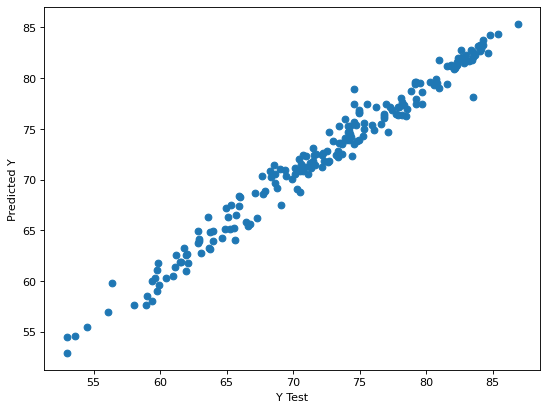

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Residuals

c:\users\98930\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


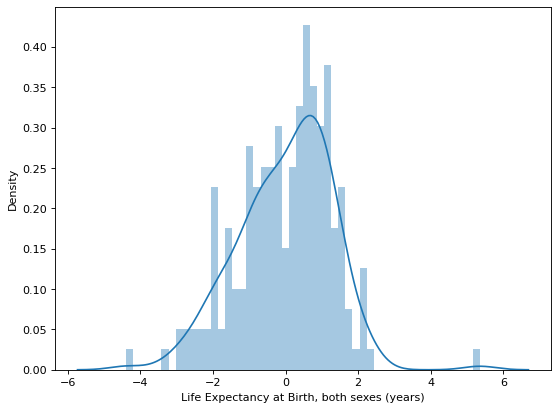

In [170]:
import seaborn as sns
figure(figsize=(8, 6), dpi=80)
sns.distplot((y_test-pred),bins=50);